In [ ]:
!pip install matplotlib==3.10.3 seaborn==0.13.2 plotly==6.1.2 pycountry==24.6.1 networkx==3.5 scipy==1.15.3 --upgrade nbformat --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 445.2 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.8 MB 939.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 1.4 MB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.8 MB 2.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import networkx as nx
from itertools import combinations

In [16]:
df = pd.read_csv('top500_transformed.csv', index_col=0)

In [5]:
df.head()

,title,year,duration,rating_value,rating_count,critic_rating_value,critic_count,directors,screenwriters,production_countries,...,boxoffice_outside_usa,budget,genres,duration_minutes,world_premiere_parsed,polish_premiere_parsed,boxoffice_in$,boxoffice_usa_in$,boxoffice_outside_usa_in$,budget_in$
position,,,,,,,,,,,,,,,,,,,,,
1,The Shawshank Redemption,1994,2h 22m,"8,8",955674,"8,2",91,['Frank Darabont'],['Frank Darabont'],['USA'],...,$117 315,$25 000 000,['Dramat'],142,1994-09-10,1995-04-16,28884504.0,28767189.0,117315.0,25000000.0
2,The Green Mile,1999,3h 8m,"8,6",1030633,"7,2",73,['Frank Darabont'],['Frank Darabont'],['USA'],...,$150 000 000,$60 000 000,['Dramat'],188,1999-12-06,2000-03-24,286801374.0,136801374.0,150000000.0,60000000.0
3,Intouchables,2011,1h 52m,"8,6",703261,"7,1",86,"['Olivier Nakache', 'Éric Toledano']","['Olivier Nakache', 'Éric Toledano']",['Francja'],...,$416 389 690,$10 800 000,"['Biograficzny', 'Dramat', 'Komedia']",112,2011-09-23,2012-04-13,426588510.0,10198820.0,416389690.0,10800000.0
4,The Godfather,1972,2h 55m,"8,6",566582,"9,1",87,['Francis Ford Coppola'],"['Mario Puzo', 'Francis Ford Coppola']",['USA'],...,$113 960 743,$6 000 000,"['Dramat', 'Gangsterski']",175,1972-03-14,1972-12-31,250341816.0,136381073.0,113960743.0,6000000.0
5,12 Angry Men,1957,1h 36m,"8,7",236509,"8,9",86,['Sidney Lumet'],['Reginald Rose'],['USA'],...,NaN,NaN,['Dramat sądowy'],96,1957-04-10,1959-11-01,337000.0,NaN,NaN,NaN


Transforming rating columns to numerical values.

In [17]:
df['rating_value'] = df['rating_value'].str.replace(',', '.')
df['rating_value'] = pd.to_numeric(df['rating_value'], errors='coerce')

df['critic_rating_value'] = df['critic_rating_value'].str.replace(',', '.')
df['critic_rating_value'] = pd.to_numeric(df['critic_rating_value'], errors='coerce')

Creating two copies of the DataFrame: one with the 'directors' column exploded, and the second with the 'screenwriters' column exploded.

In [18]:
# Changing string to lists
df['directors'] = df['directors'].apply(ast.literal_eval)
df['screenwriters'] = df['screenwriters'].apply(ast.literal_eval)

df_directors = df.explode('directors').reset_index(drop=False)
df_screenwriters = df.explode('screenwriters').reset_index(drop=False)

In [19]:
df_screenwriters.head()

,position,title,year,duration,rating_value,rating_count,critic_rating_value,critic_count,directors,screenwriters,...,boxoffice_outside_usa,budget,genres,duration_minutes,world_premiere_parsed,polish_premiere_parsed,boxoffice_in$,boxoffice_usa_in$,boxoffice_outside_usa_in$,budget_in$
0,1,The Shawshank Redemption,1994,2h 22m,8.8,955674,8.2,91,[Frank Darabont],Frank Darabont,...,$117 315,$25 000 000,['Dramat'],142,1994-09-10,1995-04-16,28884504.0,28767189.0,117315.0,25000000.0
1,2,The Green Mile,1999,3h 8m,8.6,1030633,7.2,73,[Frank Darabont],Frank Darabont,...,$150 000 000,$60 000 000,['Dramat'],188,1999-12-06,2000-03-24,286801374.0,136801374.0,150000000.0,60000000.0
2,3,Intouchables,2011,1h 52m,8.6,703261,7.1,86,"[Olivier Nakache, Éric Toledano]",Olivier Nakache,...,$416 389 690,$10 800 000,"['Biograficzny', 'Dramat', 'Komedia']",112,2011-09-23,2012-04-13,426588510.0,10198820.0,416389690.0,10800000.0
3,3,Intouchables,2011,1h 52m,8.6,703261,7.1,86,"[Olivier Nakache, Éric Toledano]",Éric Toledano,...,$416 389 690,$10 800 000,"['Biograficzny', 'Dramat', 'Komedia']",112,2011-09-23,2012-04-13,426588510.0,10198820.0,416389690.0,10800000.0
4,4,The Godfather,1972,2h 55m,8.6,566582,9.1,87,[Francis Ford Coppola],Mario Puzo,...,$113 960 743,$6 000 000,"['Dramat', 'Gangsterski']",175,1972-03-14,1972-12-31,250341816.0,136381073.0,113960743.0,6000000.0


Testing network graph

In [ ]:
df['creators'] = df['directors'] + df['screenwriters']

In [ ]:
G = nx.Graph()

for creators_list in df['creators']:
    for creator in creators_list:
        G.add_node(creator)
    for pair in combinations(creators_list, 2):
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1)


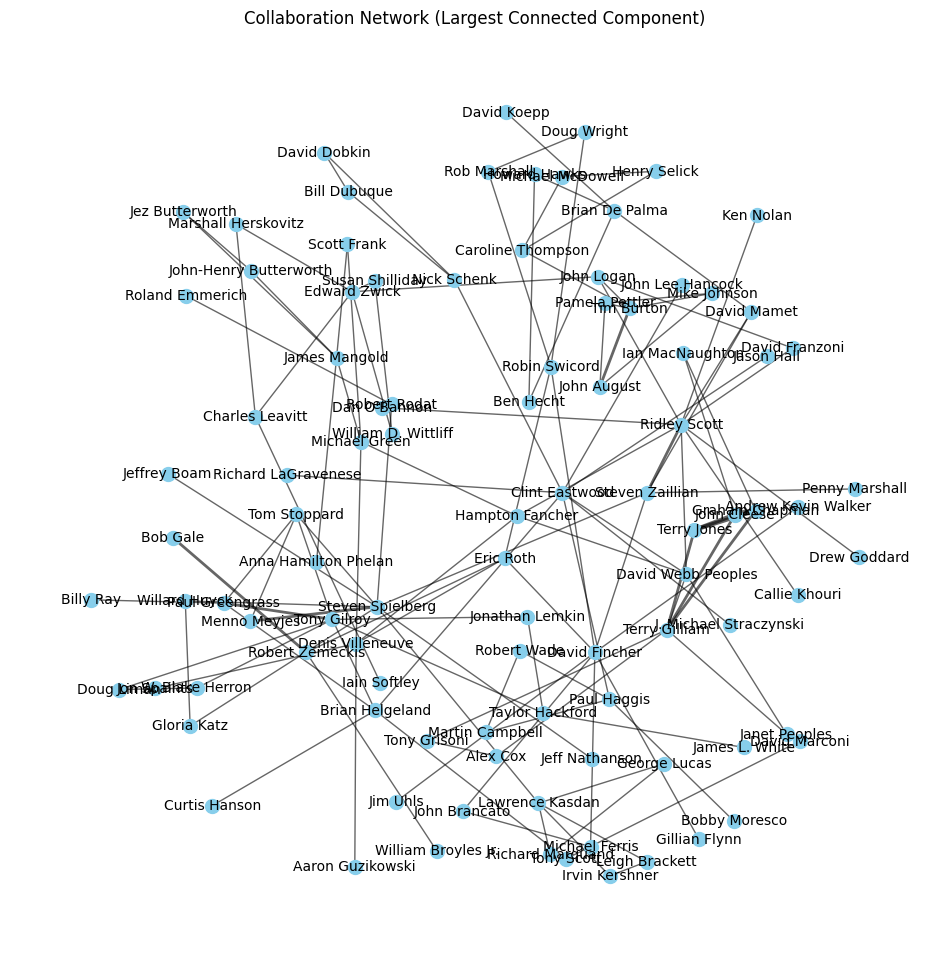

In [ ]:
G = nx.Graph()

for creators_list in df['creators']:
    creators_set = set(creators_list)
    if len(creators_set) > 1:
        for pair in combinations(creators_set, 2):
            if G.has_edge(*pair):
                G[pair[0]][pair[1]]['weight'] += 1
            else:
                G.add_edge(pair[0], pair[1], weight=1)

largest_cc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(largest_cc)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_sub, k=0.5, seed=42)
weights = [G_sub[u][v]['weight'] for u,v in G_sub.edges()]
nx.draw_networkx_nodes(G_sub, pos, node_size=100, node_color='skyblue')
nx.draw_networkx_edges(G_sub, pos, width=[w for w in weights], alpha=0.6)
nx.draw_networkx_labels(G_sub, pos, font_size=10)
plt.title("Collaboration Network (Largest Connected Component)")
plt.axis('off')
plt.show()

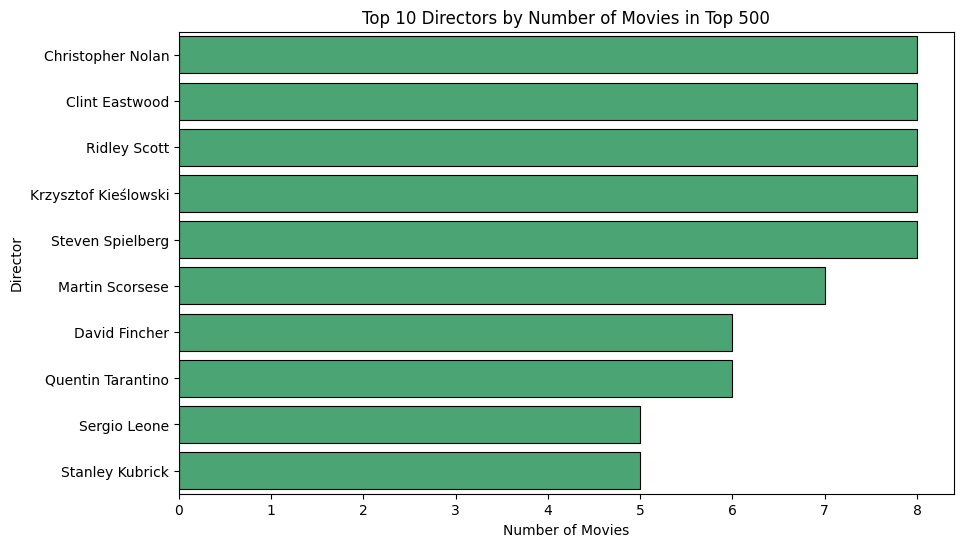

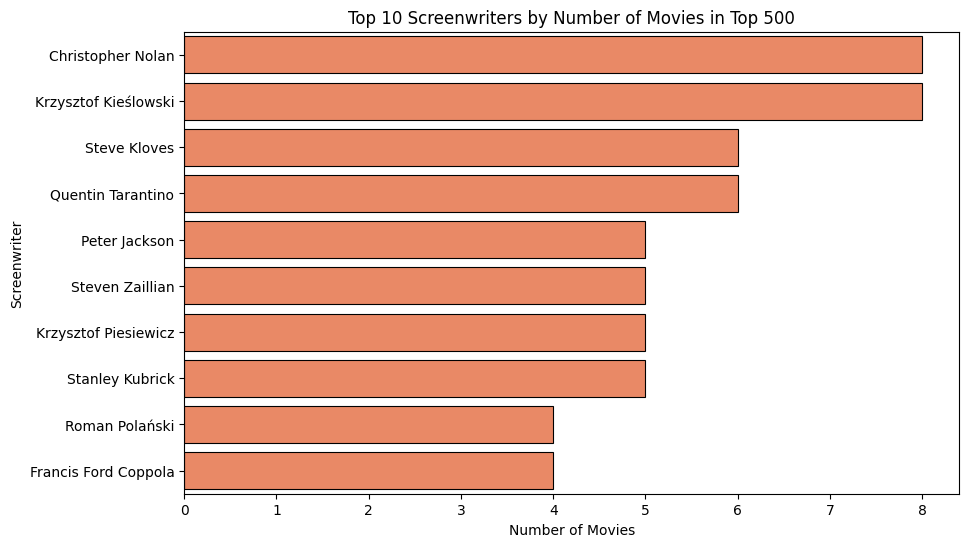

In [41]:
top_directors = df_directors['directors'].value_counts().head(10)
top_screenwriters = df_screenwriters['screenwriters'].value_counts().head(10)

# Directors
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_directors.values, y=top_directors.index, color='mediumseagreen')

for bar in ax.patches:
    bar.set_edgecolor('black')   
    bar.set_linewidth(0.8)  

plt.title('Top 10 Directors by Number of Movies in Top 500')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.savefig('creators_directors.png', dpi=300, bbox_inches='tight')
plt.show()

# Screenwriters
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_screenwriters.values, y=top_screenwriters.index, color='coral')

for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)

plt.title('Top 10 Screenwriters by Number of Movies in Top 500')
plt.xlabel('Number of Movies')
plt.ylabel('Screenwriter')
plt.savefig('creators_screenwriters.png', dpi=300, bbox_inches='tight')
plt.show()


Creating another version with different colors

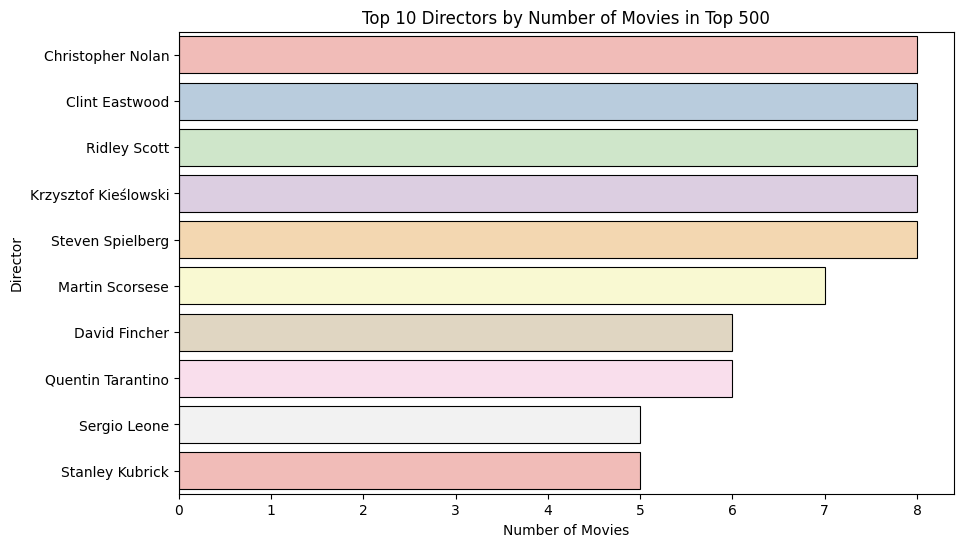

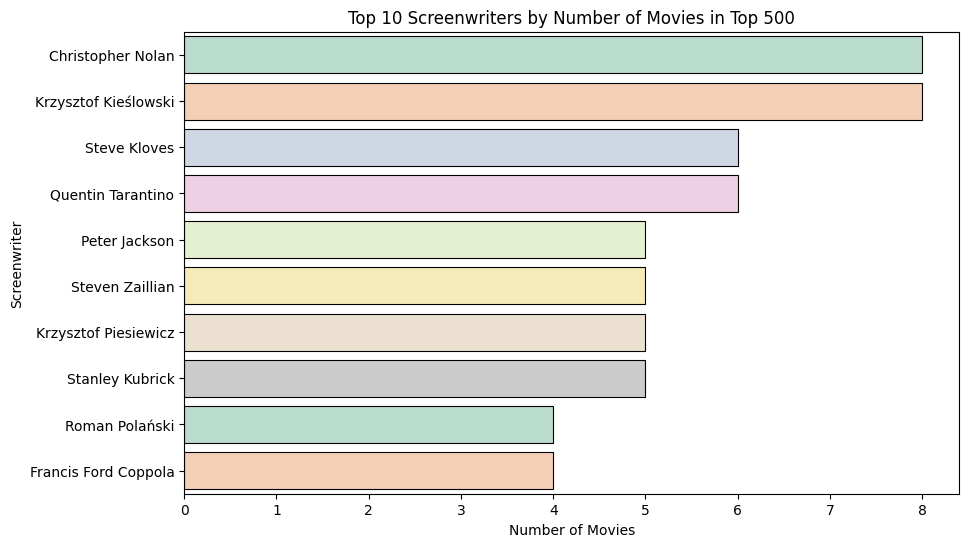

In [49]:
top_directors = df_directors['directors'].value_counts().head(10)
top_screenwriters = df_screenwriters['screenwriters'].value_counts().head(10)

palette_directors = sns.color_palette("Pastel1", n_colors=10)
palette_screenwriters = sns.color_palette("Pastel2", n_colors=10)

# Directors
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    hue=top_directors.index,
    palette=palette_directors,
    dodge=False,
    legend=False 
)
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)

plt.title('Top 10 Directors by Number of Movies in Top 500')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

# Screenwriters
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_screenwriters.values,
    y=top_screenwriters.index,
    hue=top_screenwriters.index,
    palette=palette_screenwriters,
    dodge=False,
    legend=False
)
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)

plt.title('Top 10 Screenwriters by Number of Movies in Top 500')
plt.xlabel('Number of Movies')
plt.ylabel('Screenwriter')
plt.show()


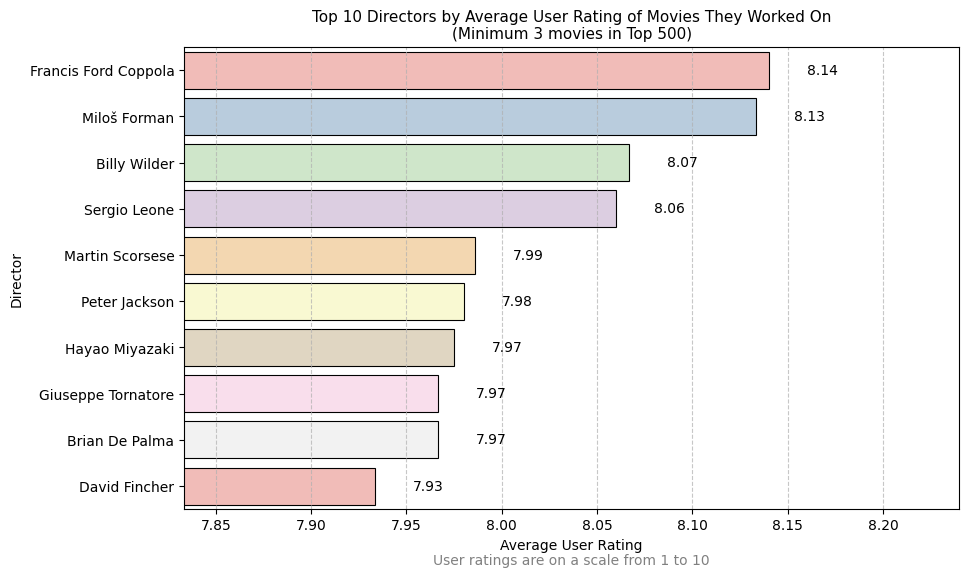

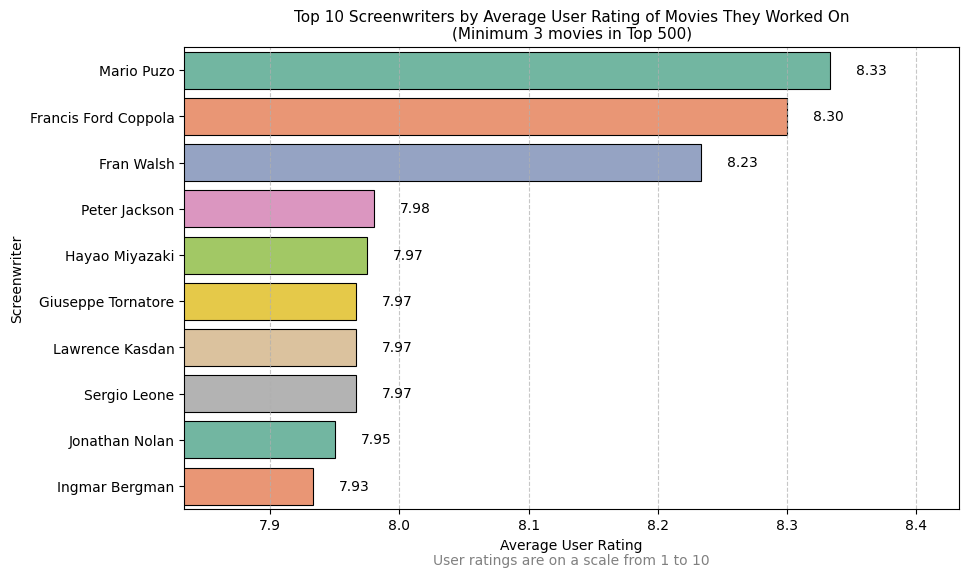

In [83]:
# Directors
director_ratings = df_directors.groupby('directors').agg(
    avg_rating=('rating_value', 'mean'),
    count=('title', 'count')
).reset_index()
director_ratings = director_ratings[director_ratings['count'] >= 3]
top10_directors_by_rating = director_ratings.sort_values('avg_rating', ascending=False).head(10)

palette_directors = sns.color_palette("Pastel1", n_colors=10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top10_directors_by_rating['avg_rating'],
    y=top10_directors_by_rating['directors'],
    palette=palette_directors,
    hue=top10_directors_by_rating['directors'],
    dodge=False,
    legend=False
)
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)

for i, v in enumerate(top10_directors_by_rating['avg_rating']):
    ax.text(v + 0.02, i, f"{v:.2f}", color='black', va='center')

plt.text(
    x=0.5, y=-0.11, s="User ratings are on a scale from 1 to 10",
    ha='center', va='center', fontsize=10, color='gray',
    transform=ax.transAxes
)

plt.title(
    "Top 10 Directors by Average User Rating of Movies They Worked On\n"
    "(Minimum 3 movies in Top 500)",
    loc='center', fontsize=11
)
plt.xlabel('Average User Rating')
plt.ylabel('Director')
plt.xlim( min(top10_directors_by_rating['avg_rating']) - 0.1, max(top10_directors_by_rating['avg_rating']) + 0.1 )
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('directors_rating.png', dpi=300, bbox_inches='tight')
plt.show()


# Screenwriters
screenwriter_ratings = df_screenwriters.groupby('screenwriters').agg(
    avg_rating=('rating_value', 'mean'),
    count=('title', 'count')
).reset_index()
screenwriter_ratings = screenwriter_ratings[screenwriter_ratings['count'] >= 3]
top10_screenwriters_by_rating = screenwriter_ratings.sort_values('avg_rating', ascending=False).head(10)

palette_screenwriters = sns.color_palette("Set2", n_colors=10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top10_screenwriters_by_rating['avg_rating'],
    y=top10_screenwriters_by_rating['screenwriters'],
    palette=palette_screenwriters,
    hue=top10_screenwriters_by_rating['screenwriters'],
    dodge=False,
    legend=False
)
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)

for i, v in enumerate(top10_screenwriters_by_rating['avg_rating']):
    ax.text(v + 0.02, i, f"{v:.2f}", color='black', va='center')

plt.text(
    x=0.5, y=-0.11, s="User ratings are on a scale from 1 to 10",
    ha='center', va='center', fontsize=10, color='gray',
    transform=ax.transAxes
)

plt.title(
    "Top 10 Screenwriters by Average User Rating of Movies They Worked On\n"
    "(Minimum 3 movies in Top 500)",
    loc='center', fontsize=11
)
plt.xlabel('Average User Rating')
plt.ylabel('Screenwriter')
plt.xlim( min(top10_screenwriters_by_rating['avg_rating']) - 0.1, max(top10_screenwriters_by_rating['avg_rating']) + 0.1 )
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('screenwriters_rating.png', dpi=300, bbox_inches='tight')
plt.show()

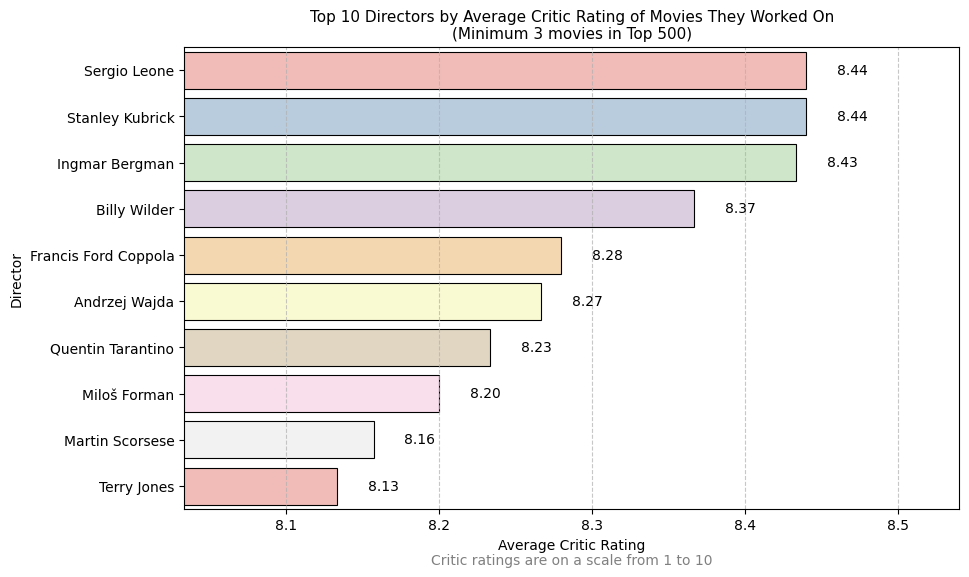

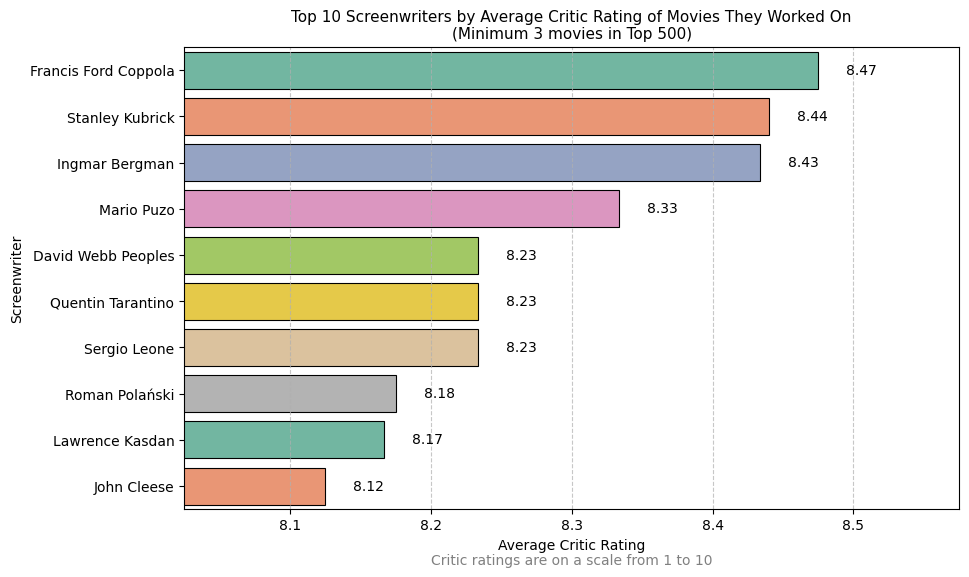

In [84]:
# Directors - average critic rating
director_critic_ratings = df_directors.groupby('directors').agg(
    avg_critic_rating=('critic_rating_value', 'mean'),
    count=('title', 'count')
).reset_index()
director_critic_ratings = director_critic_ratings[director_critic_ratings['count'] >= 3]
top10_directors_by_critic = director_critic_ratings.sort_values('avg_critic_rating', ascending=False).head(10)

palette_directors = sns.color_palette("Pastel1", n_colors=10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top10_directors_by_critic['avg_critic_rating'],
    y=top10_directors_by_critic['directors'],
    palette=palette_directors,
    hue=top10_directors_by_critic['directors'],
    dodge=False,
    legend=False
)
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)

for i, v in enumerate(top10_directors_by_critic['avg_critic_rating']):
    ax.text(v + 0.02, i, f"{v:.2f}", color='black', va='center')

plt.text(
    x=0.5, y=-0.11, s="Critic ratings are on a scale from 1 to 10",
    ha='center', va='center', fontsize=10, color='gray',
    transform=ax.transAxes
)

plt.title(
    "Top 10 Directors by Average Critic Rating of Movies They Worked On\n"
    "(Minimum 3 movies in Top 500)",
    loc='center', fontsize=11
)
plt.xlabel('Average Critic Rating')
plt.ylabel('Director')
plt.xlim(min(top10_directors_by_critic['avg_critic_rating']) - 0.1, max(top10_directors_by_critic['avg_critic_rating']) + 0.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('directors_critic.png', dpi=300, bbox_inches='tight')
plt.show()


# Screenwriters - average critic rating
screenwriter_critic_ratings = df_screenwriters.groupby('screenwriters').agg(
    avg_critic_rating=('critic_rating_value', 'mean'),
    count=('title', 'count')
).reset_index()
screenwriter_critic_ratings = screenwriter_critic_ratings[screenwriter_critic_ratings['count'] >= 3]
top10_screenwriters_by_critic = screenwriter_critic_ratings.sort_values('avg_critic_rating', ascending=False).head(10)

palette_screenwriters = sns.color_palette("Set2", n_colors=10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top10_screenwriters_by_critic['avg_critic_rating'],
    y=top10_screenwriters_by_critic['screenwriters'],
    palette=palette_screenwriters,
    hue=top10_screenwriters_by_critic['screenwriters'],
    dodge=False,
    legend=False
)
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)

for i, v in enumerate(top10_screenwriters_by_critic['avg_critic_rating']):
    ax.text(v + 0.02, i, f"{v:.2f}", color='black', va='center')

plt.text(
    x=0.5, y=-0.11, s="Critic ratings are on a scale from 1 to 10",
    ha='center', va='center', fontsize=10, color='gray',
    transform=ax.transAxes
)

plt.title(
    "Top 10 Screenwriters by Average Critic Rating of Movies They Worked On\n"
    "(Minimum 3 movies in Top 500)",
    loc='center', fontsize=11
)
plt.xlabel('Average Critic Rating')
plt.ylabel('Screenwriter')
plt.xlim(min(top10_screenwriters_by_critic['avg_critic_rating']) - 0.1, max(top10_screenwriters_by_critic['avg_critic_rating']) + 0.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('screenwriters_critic.png', dpi=300, bbox_inches='tight')
plt.show()